# 1. Preparing Data

In [0]:
import numpy as np
np.random.seed()

#generate correct examples
def CorrectGenrator(N):
    A = np.random.randint(1000, size=N)
    B = np.random.randint(1000, size=N)
    C = A + B
    return A, B, C


#generate wrong examles
def WrongGenrator(N):
    A = np.random.randint(1000, size=N)
    B = np.random.randint(1000, size=N)
    C = np.random.randint(1000, size=N)
    C = C + (C==A+B) #add 1 to those happen to be equal
    return A, B, C


#preprocess data using one hot encoding, return N*3*4*10, 3 channels for 3 numbers, each number is a 4 by 10 matrix
def DataPreProcessing(A, B, C):
    N = len(A)
    X = np.zeros((N,3,4,10))
    for k,D in enumerate([A,B,C]):
        for i in range(N):
            m = 0
            tmp = D[i]
            while(10*tmp):
                n = tmp%10
                X[i,k,m,n] = 1
                m += 1
                tmp = int(tmp/10)
    return X

In [8]:
#gernerate training data
pos_train_num = 50000
neg_train_num = 50000
A, B, C = CorrectGenrator(pos_train_num)
Xt = DataPreProcessing(A,B,C)
A, B, C = WrongGenrator(neg_train_num)
Xf = DataPreProcessing(A,B,C)
X = np.concatenate((Xt,Xf), axis=0)
Y = np.zeros(pos_train_num+neg_train_num)
Y[:pos_train_num] = 1

idx = np.random.permutation(pos_train_num+neg_train_num)
x_train = X[idx,:,:,:]
y_train = Y[idx]
print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)


#gernerate test data
pos_test_num = 5000
neg_test_num = 5000
At, Bt, Ct = CorrectGenrator(pos_test_num)
Xt = DataPreProcessing(At,Bt,Ct)
Af, Bf, Cf = WrongGenrator(neg_test_num)
Xf = DataPreProcessing(Af,Bf,Cf)
x_test = np.concatenate((Xt,Xf), axis=0)
y_test = np.zeros(pos_test_num+neg_test_num)
y_test[:pos_test_num] = 1
print('x_test: ',x_test.shape)
print('y_test: ',y_test.shape)

x_train:  (100000, 3, 4, 10)
y_train:  (100000,)
x_test:  (10000, 3, 4, 10)
y_test:  (10000,)


# 2. Simple NN

In [9]:
#build the network
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

from keras import backend as K
K.set_image_data_format('channels_first')


model = Sequential()

model.add(Flatten(input_shape=(3,4,10)))
model.add(Dense(120, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=32, validation_split=0.2, epochs=10, verbose=1)

Train on 80000 samples, validate on 20000 samples
Epoch 1/10
80000/80000 [==============================] - 5s 68us/step - loss: 0.2754 - acc: 0.8603 - val_loss: 0.1489 - val_acc: 0.9414
Epoch 2/10
80000/80000 [==============================] - 5s 59us/step - loss: 0.1389 - acc: 0.9499 - val_loss: 0.1146 - val_acc: 0.9611
Epoch 3/10
80000/80000 [==============================] - 5s 59us/step - loss: 0.1210 - acc: 0.9565 - val_loss: 0.1004 - val_acc: 0.9643
Epoch 4/10
80000/80000 [==============================] - 5s 58us/step - loss: 0.1055 - acc: 0.9615 - val_loss: 0.0911 - val_acc: 0.9681
Epoch 5/10
80000/80000 [==============================] - 5s 59us/step - loss: 0.0951 - acc: 0.9670 - val_loss: 0.0937 - val_acc: 0.9670
Epoch 6/10
80000/80000 [==============================] - 5s 59us/step - loss: 0.0893 - acc: 0.9694 - val_loss: 0.0761 - val_acc: 0.9745
Epoch 7/10
80000/80000 [==============================] - 5s 59us/step - loss: 0.0864 - acc: 0.9713 - val_loss: 0.1084 - val_acc

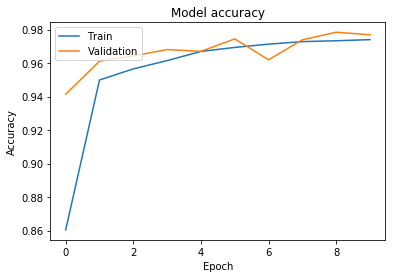

In [10]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
score = model.evaluate(x_test, y_test, batch_size=32)
print(score[1])

y_pre = np.squeeze(model.predict(x_test)>0.5)
idx = y_pre!=y_test

10000/10000 [==============================] - 0s 28us/step
0.9757


In [12]:
#show mistakes in positive test examples
print(At[idx[:5000]])
print(Bt[idx[:5000]])
print(Ct[idx[:5000]])

[  8 169 188 240 254]
[785 266 646 311 488]
[793 435 834 551 742]


In [13]:
#show mistakes in negtive test examples
print(Af[idx[5000:]])
print(Bf[idx[5000:]])
print(Cf[idx[5000:]])

[374 580 547 440 805 121 923  24 259 582 360 273 575 780 137 252  33 538
  97 353 337 201 874 406 317 123 229  66 516 102 486 165  66 598 323 773
  39 161 124 385 273 425 465 307  36 726 382  20 455 395 291 447 663 217
 177   2 616 111 173 900 319 385 702 362 637  82  79  79  53 782 326 408
 400 762 103 144 246 117 423 550 716 459 209 387 297 518  82 173 249 667
 672 213 677 754  78 178 324 139 584 187 334 191  82 128  62 848 588 497
 178 195  27 750 648 110  63 293 136 428 179 354  85  91  21  94  81 219
 662 421 149 434  10  46 163 911 533 515 386 534 106 326 181 245  29 471
 456 293 714 254 419 225 342 179 317 216 416  88 187  48 139 623 284 260
 145 135  34 444  59 234  17 453 794 105 392  94 489 503  85  15 381 166
 464 561 298  62 212 126 510 191 231 526 119 307 644 214 237 296 500 116
 121  37 422 103 518 535 627  22 171 658  43 407 512 737  26 844 345 373
 580 192 608 409 613 317 253 263 113 248 567 256  18 294 128 299 214  69
 144 247 108 378]
[255  52 259 288  29 431 130 443 

# 3. Simple CNN

In [14]:
#build the network
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D

from keras import backend as K
K.set_image_data_format('channels_first')


model = Sequential()

model.add(Conv2D(8, (1, 1), activation='relu', input_shape=(3,4,10)))
model.add(Conv2D(8, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=32, validation_split=0.2, epochs=10, verbose=1)

Train on 80000 samples, validate on 20000 samples
Epoch 1/10
80000/80000 [==============================] - 10s 119us/step - loss: 0.3779 - acc: 0.7918 - val_loss: 0.2778 - val_acc: 0.8659
Epoch 2/10
80000/80000 [==============================] - 9s 113us/step - loss: 0.2314 - acc: 0.8924 - val_loss: 0.1849 - val_acc: 0.9212
Epoch 3/10
80000/80000 [==============================] - 9s 108us/step - loss: 0.1605 - acc: 0.9369 - val_loss: 0.1323 - val_acc: 0.9563
Epoch 4/10
80000/80000 [==============================] - 10s 119us/step - loss: 0.1299 - acc: 0.9514 - val_loss: 0.1239 - val_acc: 0.9515
Epoch 5/10
80000/80000 [==============================] - 10s 127us/step - loss: 0.1151 - acc: 0.9572 - val_loss: 0.2200 - val_acc: 0.8703
Epoch 6/10
80000/80000 [==============================] - 9s 115us/step - loss: 0.1054 - acc: 0.9620 - val_loss: 0.0934 - val_acc: 0.9683
Epoch 7/10
80000/80000 [==============================] - 9s 111us/step - loss: 0.0959 - acc: 0.9668 - val_loss: 0.0751

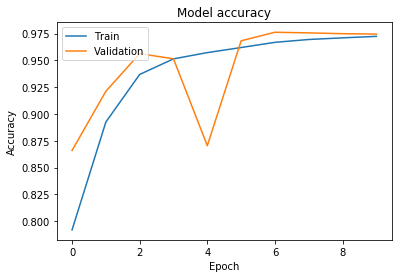

In [15]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
score = model.evaluate(x_test, y_test, batch_size=32)
print(score[1])

y_pre = np.squeeze(model.predict(x_test)>0.5)
idx = y_pre!=y_test

10000/10000 [==============================] - 0s 43us/step
0.9743


In [17]:
#show mistakes in positive test examples
print(At[idx[:5000]])
print(Bt[idx[:5000]])
print(Ct[idx[:5000]])

[  3 457 464  40  57  64 435 462  54  67  44  38  16  43   6   5   6  59
   5  49]
[ 10 244 339   8   4  17 369 325  36  32  23  36  51  30   7  48  50  37
  73  37]
[ 13 701 803  48  61  81 804 787  90  99  67  74  67  73  13  53  56  96
  78  86]


In [18]:
#show mistakes in negtive test examples
print(Af[idx[5000:]])
print(Bf[idx[5000:]])
print(Cf[idx[5000:]])

[374 580 440 805  24 259 582 360 100 273 575 137 522  33 459 538  97 353
 337 874 406 317  89 123 229  66 516 165 406 374  66 521 598 444 773 491
  39 161 124 273 425 202 254  36 726 382  20 455 395 291 447 217 177 616
  32 111 173 476 900 385 702 362 637  82  79 475 117  79  53 782 326 408
 400 412 103 377 144 246 117 496 423 550 716 459 209 297 518  82 173 667
 672 677 754 178 324 139 584 187 334 191  82 128  62 159 588  49 225  75
 178 360 195  27 750 648 110 527 492 293 428 354  85 435  91  21  94  81
 219 662 421 149  75 434 193  46 163 533 515 386 534 106 326 181 493 245
 312 170  29 471  98 293 714 419 149 342 179 317 216 416  88  80 187 139
 779 260 145 135 444  59 234 185 669 453 105 392  94 489 503  85  15 381
 166 464 561 406 298  62 212 126 510 551 191  97 119 390 307 644 675 214
 296 500 116 121 422 103 518 535 627  22 171 658  43 407 512 737 844 345
 373 580 192 409 613 317 253 248 567 256  18 198 108 294 128 214  69 436
 247 108 378]
[255  52 288  29 443 395 371 312 781 

 At first, I mistakenly set image_data_format to be 'channels_last'. Interestingly, it works much better, especially in positive test examples. I guess it implys some other kind of logic. Turning original numbers into what we thought as 'one-hot-encoding' is just merely one kind of encoding. Actually viewing the data as channel last is another kind of one to one encoding. The following results is just from mistakenly 'channels_last'. All the others are the same as above.

In [19]:
#build the network
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras import backend as K
K.set_image_data_format('channels_last')


model = Sequential()

model.add(Conv2D(8, (1, 1), activation='relu', input_shape=(3,4,10)))
model.add(Conv2D(8, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=32, validation_split=0.2, epochs=10, verbose=1)

Train on 80000 samples, validate on 20000 samples
Epoch 1/10
80000/80000 [==============================] - 6s 70us/step - loss: 0.3691 - acc: 0.8057 - val_loss: 0.2111 - val_acc: 0.9134
Epoch 2/10
80000/80000 [==============================] - 5s 63us/step - loss: 0.1374 - acc: 0.9504 - val_loss: 0.0918 - val_acc: 0.9720
Epoch 3/10
80000/80000 [==============================] - 5s 59us/step - loss: 0.0871 - acc: 0.9713 - val_loss: 0.0658 - val_acc: 0.9770
Epoch 4/10
80000/80000 [==============================] - 5s 59us/step - loss: 0.0745 - acc: 0.9760 - val_loss: 0.0588 - val_acc: 0.9795
Epoch 5/10
80000/80000 [==============================] - 5s 57us/step - loss: 0.0682 - acc: 0.9785 - val_loss: 0.0590 - val_acc: 0.9810
Epoch 6/10
80000/80000 [==============================] - 5s 56us/step - loss: 0.0652 - acc: 0.9796 - val_loss: 0.0467 - val_acc: 0.9856
Epoch 7/10
80000/80000 [==============================] - 5s 56us/step - loss: 0.0629 - acc: 0.9801 - val_loss: 0.0482 - val_acc

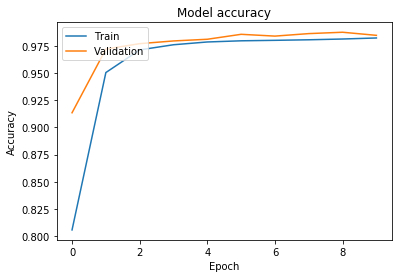

In [20]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [21]:
score = model.evaluate(x_test, y_test, batch_size=32)
print(score[1])

y_pre = np.squeeze(model.predict(x_test)>0.5)
idx = y_pre!=y_test

10000/10000 [==============================] - 0s 20us/step
0.9838


In [22]:
#show mistakes in positive test examples
print(At[idx[:5000]])
print(Bt[idx[:5000]])
print(Ct[idx[:5000]])

[]
[]
[]


In [23]:
#show mistakes in negtive test examples
print(Af[idx[5000:]])
print(Bf[idx[5000:]])
print(Cf[idx[5000:]])

[374 440 805 923 259 582 360 100 273 575 137 538  97 353 337 123 229  66
 516 486 165  66 598 161 124 425 465  36 726 382  20 118 395 291 447 616
 218 113 111 173 385 702 362 637  82  79  79  53 782 400 103 144 246 117
 423 297 518  82 173 667 672 677 754 178 139 584 187 334 191 128  62 159
 848 588 497 178 195  27 122 648 110 354  85  21  94  81 219 662 421 434
  10  46 163 911 533 515 534 106 181 245  29 293 714 419 342 179 216 416
  88 187 139 284 260 145 135 234 105 503  15 381 166 464 561 298 212 126
 510 191 526 644 675 214 500 116 121 422 103 518 535 586 627  22 171 658
  43 512 844 345 580 409 613 317 113 248 256  18 294 128 214  69 247 378]
[255 288  29 130 395 371 312 781 249 229 833  94 847 357 234 112 405 795
 275 379  14 492 236 552 207 379 333 652  98 576 539 818 142 458 392  89
 328 824 702 823 196 174 506  20 860 883 760  45 121 257 146 341 571 749
 504 462 432 714 790  66 132 285  73 732 730  65 487 649 676 347 370 267
 179  41 284 259 625 237 179 290 522 340 586 285 2

# 4. CNN with Repeated encoding
Since the encoding matrix is too small (3,4,10), it is diffcult to perform covolution operator, so I just dupicate the ones and zeros to get a (3,40,40) matrix.

In [24]:
#repeat the data to get a larger matrix
X_train = np.repeat(x_train, 8, axis=3)
X_train = np.repeat(X_train, 20, axis=2)
print('X_train: ',X_train.shape)
X_test = np.repeat(x_test, 8, axis=3)
X_test = np.repeat(X_test, 20, axis=2)
print('X_test: ',X_test.shape)

X_train:  (100000, 3, 80, 80)
X_test:  (10000, 3, 80, 80)


In [25]:
#build the network
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras import backend as K
K.set_image_data_format('channels_first')


model = Sequential()

model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(3,80,80)))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=32, validation_split=0.2, epochs=10, verbose=1)

Train on 80000 samples, validate on 20000 samples
Epoch 1/10
80000/80000 [==============================] - 509s 6ms/step - loss: 0.2239 - acc: 0.8925 - val_loss: 0.1203 - val_acc: 0.9694
Epoch 2/10
80000/80000 [==============================] - 481s 6ms/step - loss: 0.1219 - acc: 0.9525 - val_loss: 0.0662 - val_acc: 0.9768
Epoch 3/10
80000/80000 [==============================] - 477s 6ms/step - loss: 0.0992 - acc: 0.9636 - val_loss: 0.0604 - val_acc: 0.9860
Epoch 4/10
80000/80000 [==============================] - 475s 6ms/step - loss: 0.0888 - acc: 0.9690 - val_loss: 0.0602 - val_acc: 0.9789
Epoch 5/10
80000/80000 [==============================] - 511s 6ms/step - loss: 0.0838 - acc: 0.9715 - val_loss: 0.0421 - val_acc: 0.9856
Epoch 6/10
80000/80000 [==============================] - 522s 7ms/step - loss: 0.0778 - acc: 0.9742 - val_loss: 0.0466 - val_acc: 0.9838
Epoch 7/10
80000/80000 [==============================] - 483s 6ms/step - loss: 0.0740 - acc: 0.9758 - val_loss: 0.0448 - 